**<h1>Dataset:</h1>**
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset



In [ ]:
##Axis=1 mane coloumn ar 0 mane rows, stratefy=y use korle ratio maintain hobe; y mane target/label values
#.fillna korle null value kora fill kore dibe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [ ]:
sp1=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
sp1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
sp1.shape

(5110, 12)

dropping id since it will not be useful.

In [ ]:
sp1.drop('id', axis= 1, inplace= True)   #Irelevant

In [ ]:
sp1.shape

(5110, 11)

In [ ]:
sp1.isnull().sum()    #Dont need null

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')      #Removes null and replaces with mean

impute.fit(sp1[['bmi']])

sp1['bmi'] = impute.transform(sp1[['bmi']])

In [ ]:
sp1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
sp1.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,5110.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.698018,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.800000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.400000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,32.800000,NaN,0.000000


In [ ]:
sp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
cata_col=['gender','ever_married','work_type','Residence_type','smoking_status']

In [ ]:
for col in cata_col:
  print('Feature name:',col)
  print(sp1[col].value_counts())
  print('==========')

Feature name: gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Feature name: ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
Feature name: work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Feature name: Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
Feature name: smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [ ]:
sp1.drop(sp1[sp1['gender']=='Other'].index,axis=0,inplace=True)
sp1.shape

(5109, 11)

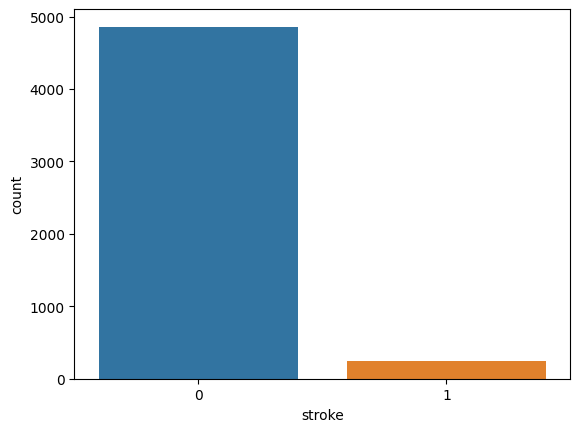

In [ ]:
plt.figure()
sns.countplot(x = 'stroke', data = sp1)
plt.show()

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

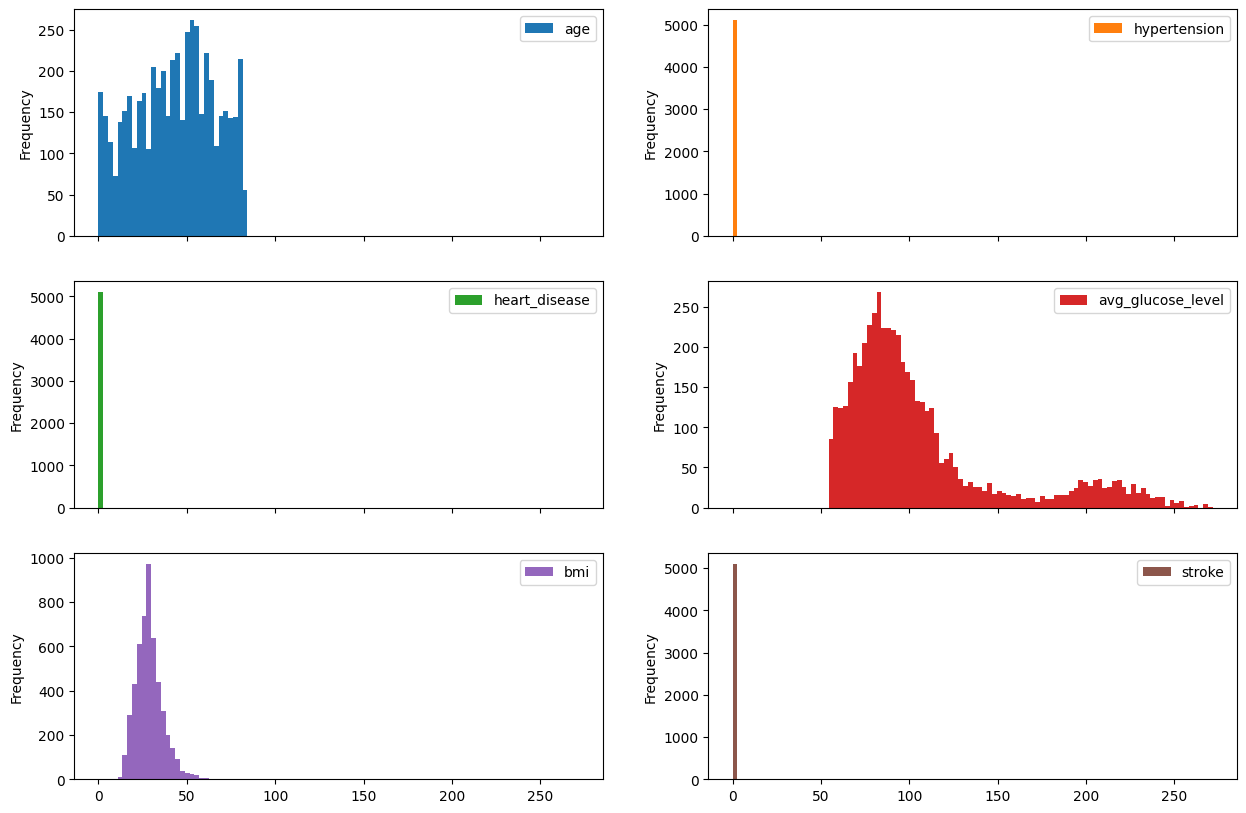

In [ ]:
sp1.plot.hist(subplots=True,layout=(3,2),figsize=(15,10),bins=100)   #Ekta plot er modhe onek gula graph rowxcol

<Axes: xlabel='smoking_status', ylabel='count'>

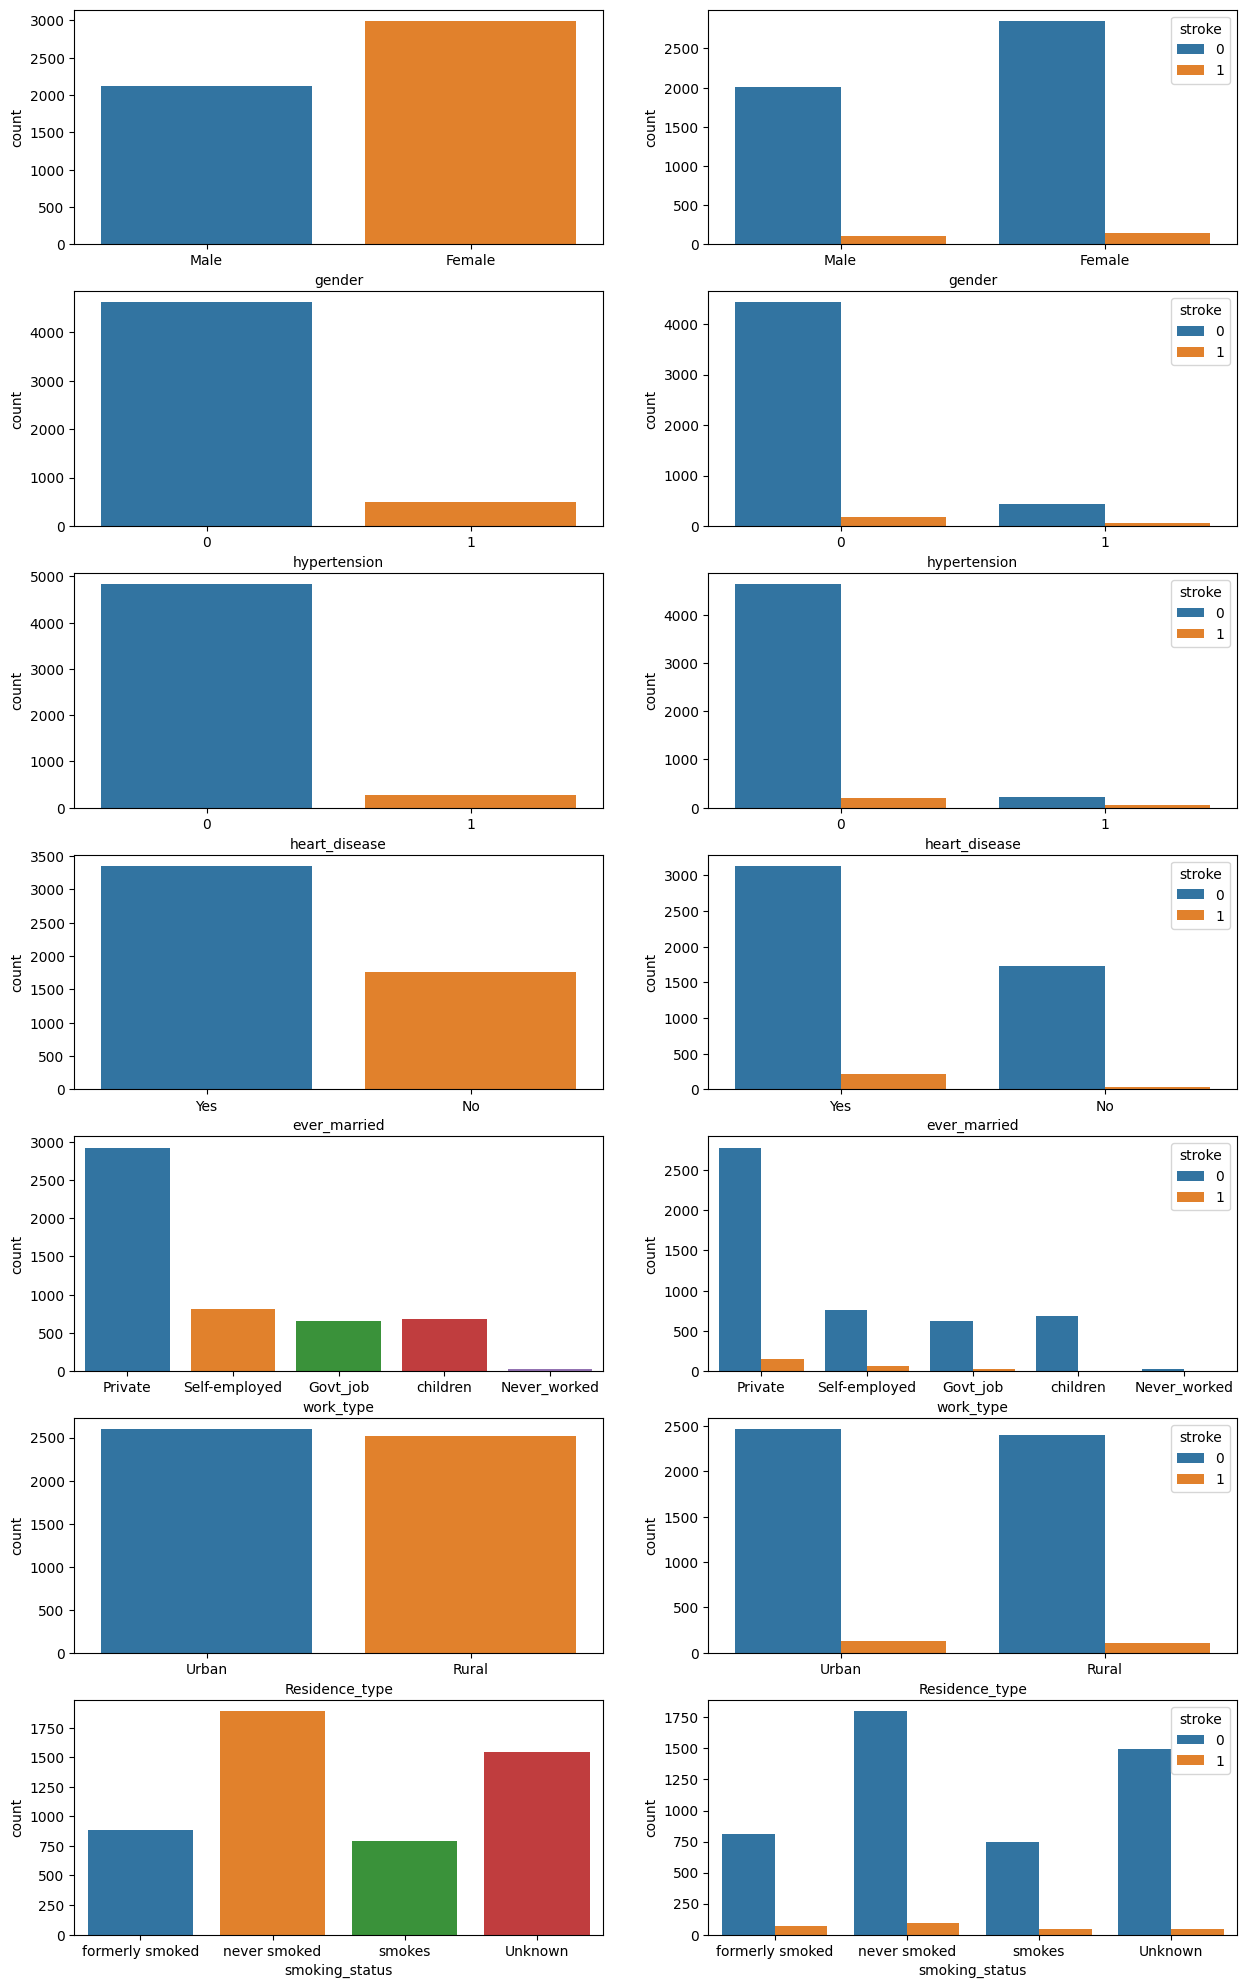

In [ ]:
fig,ax = plt.subplots(7,2,figsize=(15,25))
sns.countplot(data = sp1, x = 'gender', ax=ax[0,0])
sns.countplot(data = sp1, x = 'gender',hue='stroke', ax=ax[0,1])                  #subplot in a graph

sns.countplot(data = sp1, x = 'hypertension', ax=ax[1,0])
sns.countplot(data = sp1, x = 'hypertension',hue='stroke', ax=ax[1,1])

sns.countplot(data = sp1, x = 'heart_disease', ax=ax[2,0])
sns.countplot(data = sp1, x = 'heart_disease',hue='stroke', ax=ax[2,1])

sns.countplot(data = sp1, x = 'ever_married', ax=ax[3,0])
sns.countplot(data = sp1, x = 'ever_married',hue='stroke', ax=ax[3,1])

sns.countplot(data = sp1, x = 'work_type', ax=ax[4,0])
sns.countplot(data = sp1, x = 'work_type',hue='stroke', ax=ax[4,1])

sns.countplot(data = sp1, x = 'Residence_type', ax=ax[5,0])
sns.countplot(data = sp1, x = 'Residence_type',hue='stroke', ax=ax[5,1])

sns.countplot(data = sp1, x = 'smoking_status', ax=ax[6,0])
sns.countplot(data = sp1, x = 'smoking_status',hue='stroke', ax=ax[6,1])

In [ ]:
sp1.head()     #first 5

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
co = sp1.corr()    #Checking correlation between features--- can be used to detect linear or nonlinear
co

<ipython-input-20-3316623c888a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co = sp1.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.325858,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.160147,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038862,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.168910,0.131991
bmi,0.325858,0.160147,0.038862,0.168910,1.000000,0.038912
stroke,0.245239,0.127891,0.134905,0.131991,0.038912,1.000000


<Axes: >

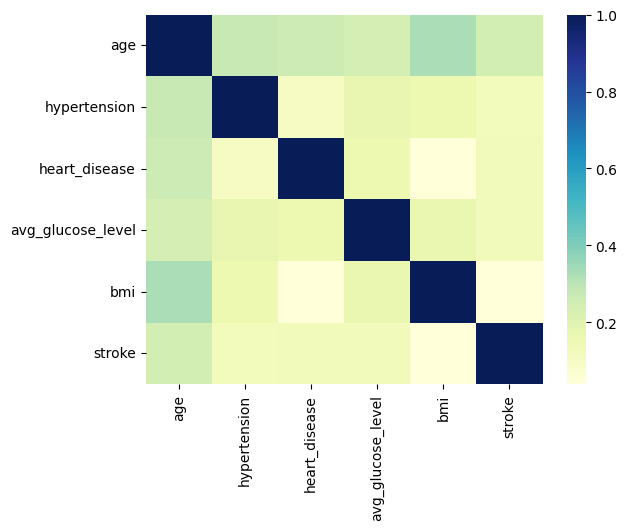

In [ ]:
sns.heatmap(co,cmap = 'YlGnBu')# the string is a color map   #Can remove features with low correlation

<ipython-input-22-6b868ae41bd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co = sp1.corr()


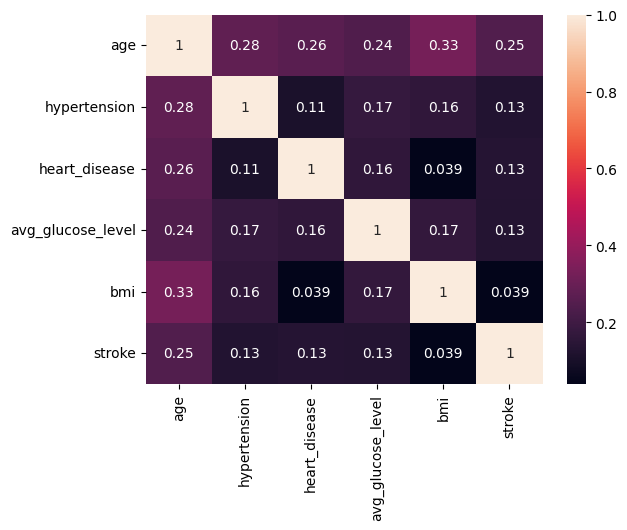

In [ ]:
co = sp1.corr()

sns.heatmap(co,annot=True)        #annot shows number
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder             #Gender e male female 0 ar 1 e encode korlam

enc = LabelEncoder()                                          #ml cant use categorical values directly so numerical short values lagbe

sp1['gender_enc'] = enc.fit_transform(sp1['gender'])

# Compare the two columns
print(sp1[['gender', 'gender_enc']].head())

   gender  gender_enc
0    Male           1
1  Female           0
2    Male           1
3  Female           0
4  Female           0


In [ ]:
sp1.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_enc
count,5109,5109.000000,5109.000000,5109.000000,5109,5109,5109,5109.000000,5109.000000,5109,5109.000000,5109.000000
unique,2,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN,NaN
freq,2994,NaN,NaN,NaN,3353,2924,2596,NaN,NaN,1892,NaN,NaN
mean,NaN,43.229986,0.097475,0.054022,NaN,NaN,NaN,106.140399,28.894508,NaN,0.048738,0.413975
std,NaN,22.613575,0.296633,0.226084,NaN,NaN,NaN,45.285004,7.698235,NaN,0.215340,0.492592
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.240000,23.800000,NaN,0.000000,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.880000,28.400000,NaN,0.000000,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,32.800000,NaN,0.000000,1.000000


In [ ]:
cata_col=cata_col[1::]   #0 excluded, 1 theke shuru so gender nai
print(cata_col)

['ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
print(sp1.columns)

for i in cata_col:
  category_enc = pd.get_dummies(sp1[i])    # one hot encoding
  sp1[category_enc.columns]=category_enc    # Inserting the encoded columns
  sp1.drop(i,axis=1,inplace=True)           # Removing cata-col

print(sp1.columns)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_enc'],
      dtype='object')
Index(['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_enc', 'No', 'Yes', 'Govt_job', 'Never_worked',
       'Private', 'Self-employed', 'children', 'Rural', 'Urban', 'Unknown',
       'formerly smoked', 'never smoked', 'smokes'],
      dtype='object')


In [ ]:
sp1.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_enc,No,Yes,...,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,228.69,36.600000,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,Female,61.0,0,0,202.21,28.893237,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,Male,80.0,0,1,105.92,32.500000,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,Female,49.0,0,0,171.23,34.400000,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,Female,79.0,1,0,174.12,24.000000,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
sp1.drop(['gender'],axis=1,inplace=True)      #preprocessing

In [ ]:
X=sp1.drop(['stroke'],axis=1)    #Stroke is the prediction so need to remove from x
y=sp1['stroke']

print(X.columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_enc', 'No', 'Yes', 'Govt_job', 'Never_worked', 'Private',
       'Self-employed', 'children', 'Rural', 'Urban', 'Unknown',
       'formerly smoked', 'never smoked', 'smokes'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                                   #Increases performance
scale_features=['bmi', 'avg_glucose_level', 'age']     #All others are encoded


sp1[scale_features] = scaler.fit_transform(sp1[scale_features])

In [ ]:
# Oversampling of Minority Class
from imblearn.over_sampling import RandomOverSampler                # To make the model less biased by duplicating some values in some columns rather than removing it
over_sample= RandomOverSampler(sampling_strategy='minority')      #No of samples in minority should be equal to majority
                                                                      #Basically dataset ta imbalanced, so its used
X_sample, y_sample = over_sample.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, train_size=0.7, test_size=0.3,
                                                      random_state=42)
print(X_train.shape)
print(X_test.shape)

(6804, 19)
(2916, 19)


The Training accuracy of the model is 0.77
The Testing accuracy of the model is 0.79


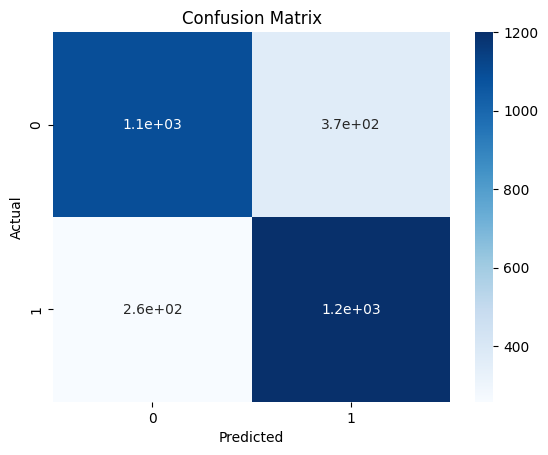

In [ ]:
from sklearn.linear_model import LogisticRegression   #Used for classification
log = LogisticRegression(max_iter=10000)                # we want to find a function that maps the input variables to the output variable, which is either 0 or 1.
log.fit(X_train, y_train)
print("The Training accuracy of the model is {:.2f}".format(log.score(X_train, y_train)))    # linear model to estimate the probability
print("The Testing accuracy of the model is {:.2f}".format(log.score(X_test, y_test)))

y_pred_log=log.predict(X_test)

                                                                     # estimating the probability that the output variable belongs to a particular class
# Calculate the confusion matrix                                    #Assumes that model is linear so if its nonlinear, accuracy beceomes low
cm = confusion_matrix(y_test, y_pred_log)                          #Less accuracy due to imbalanced data

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.97


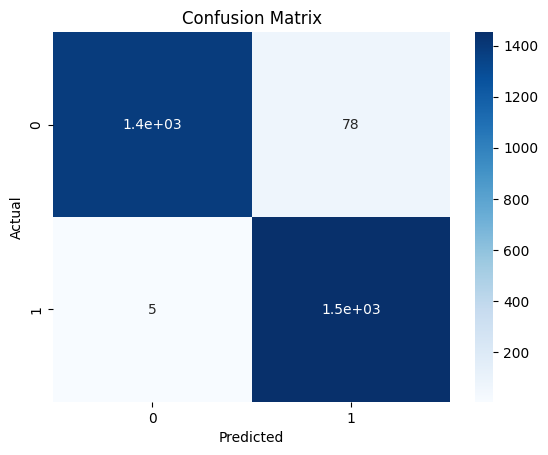

In [ ]:
from sklearn.neighbors import KNeighborsClassifier   #Euclidean distance measure kore


knn=KNeighborsClassifier(n_neighbors = 2)  #mane nearest 2ta neighbor choose korbo// jeita closest sheita hobe jodi same amount e thake nahole greater jeta sheta hobe

knn.fit(X_train, y_train)  #train korlam  #H generate hoye jai

y_pred_knn=knn.predict(X_test) #X test ja chilo, oitar predicted values ber hoye jai    #F generate hoi
print("The Training accuracy of the model is {:.2f}".format(knn.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(knn.score(X_test, y_test)))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap                          #both linear ar non linear, just distance based
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.99


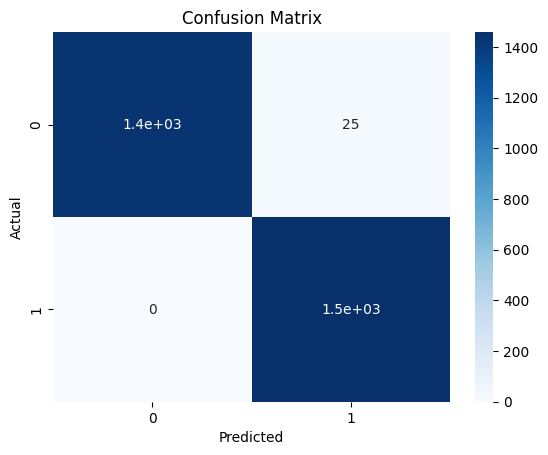

In [ ]:
#Ensemble Classifier----n_est means no of decision trees--- prottek tree theke result ashbe ar oita theke maximum ta vote kore answer hobe
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators= 100)
forest_model.fit(X_train, y_train)    #Model train korlam
y_pred_rf = forest_model.predict(X_test)   #predict korbo x test theke

print("The Training accuracy of the model is {:.2f}".format(forest_model.score(X_train, y_train)))   #Accuracy check
print("The Testing accuracy of the model is {:.2f}".format(forest_model.score(X_test, y_test)))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')                              #By combining the strengths and weaknesses we can we can build a greater accuracy
plt.title('Confusion Matrix')
plt.xlabel('Predicted')                                                #Nonlinear dhore kore so eitar accuracy beshi
plt.ylabel('Actual')
plt.show()

The Training accuracy of the model is 0.77
The Testing accuracy of the model is 0.79


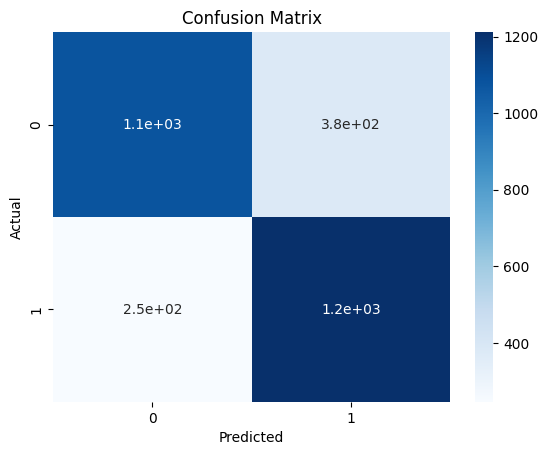

In [ ]:
#Supervised learning
from sklearn.neural_network import MLPClassifier       #Robustness its provides is an advantage ---Accuracy gets better and better with iterations increasing
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)       #Hidden phase thake---produces elegant function layer size is layers in hidden phase
nnc.fit(X_train, y_train)                                                           #Relu speeds up gradient descent--can calculate cost function

y_pred_nnc = nnc.predict(X_test)

print("The Training accuracy of the model is {:.2f}".format(nnc.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(X_test, y_test)))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_nnc)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')              #Imbalanced classes er jonno less accuracy
plt.title('Confusion Matrix')
plt.xlabel('Predicted')                                #Requires large amount of data...jeta aseh but stroke korse emon kom..so imbalance create korte pare
plt.ylabel('Actual')
plt.show()